In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

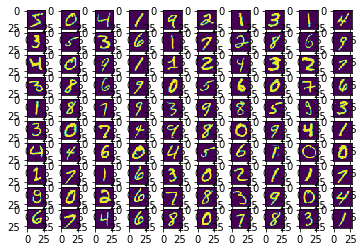

In [3]:
plt.figure()
for i in range(100):
    plt.subplot(10, 10, i +1)
    plt.imshow(x_train[i])
    
# plt.imshow(x_train[0])
plt.show()

In [16]:
# Data preprocessing 
# Flatten the data
x_train = np.reshape(x_train, [x_train.shape[0], -1])
x_test = np.reshape(x_test, [x_test.shape[0], -1])

# Convert labels to onehot vector
def one_hot(y, nb_class):
    temp = [0]*nb_class
    temp[y] = 1
    return temp

y_train_oh = np.array([one_hot(y, 10) for y in y_train], dtype=float)
y_test_oh = np.array([one_hot(y, 10) for y in y_test], dtype=float)

print(y_test[1000])
print(y_test_oh[1000])
print(y_train_oh.shape)
print(y_test_oh.shape)


9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(60000, 10)
(10000, 10)


In [4]:
# 1. Build a computational graph
x_pl = tf.placeholder(tf.float32, [None, 784])
y_pl tf.placeholder(tf.float32, [None, 10])

with tf.variable_scope('layer1'):
    weight = tf.get_variable('weight', [784, 10])
    bias = tf.get_variable('bias', [10])
    logit = tf.matmul(x_pl, weight) + tf.reshape(bias, [1, 10])
    predict = tf.nn.softmax(logit)
    
likelihood = tf.reduce_sum(predict*y_pl, axis=1)
cross_entropy_loss = tf.reduce_mean(-tf.log(likelihood))

minimize_op = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy_loss)
global_init_op = tf.global_variables_initializer()

In [10]:
with tf.Session() as sess:
    sess.run(global_init_op)
    output = sess.run(hidden1, {x_pl : x_train[:200]})
    print(output.shape)
    print(type(output))

(200, 10)
<class 'numpy.ndarray'>
